In [ ]:
import pandas as pd
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

Upload the labels.csv and processed_counts.csv files to colab or your local workspace.

This data associates a cell barcode, such as "AAAGCCTGGCTAAC-1", to a certain cell type label, such as "CD14+ Monocyte". For each cell barcode, there are also log RNA seq counts of 765 different genes, such as HES4.

label.csv stores the association between a cell barcode and a cell type label.

processed_counts.csv stores the normalized log read counts for each cell, where each row represents a single cell, and each column represents a gene.

Import data here

In [ ]:
print("These are labels: ") 


These are labels: 


,bulk_labels
index,
AAAGCCTGGCTAAC-1,CD14+ Monocyte
AAATTCGATGCACA-1,Dendritic
AACACGTGGTCTTT-1,CD56+ NK
AAGTGCACGTGCTA-1,CD4+/CD25 T Reg
ACACGAACGGAGTG-1,Dendritic


In [ ]:
print("These are counts of gene expression level: ")


These are counts of gene expression level: 


,HES4,TNFRSF4,SSU72,PARK7,RBP7,SRM,MAD2L2,AGTRAP,TNFRSF1B,EFHD2,...,ATP5O,MRPS6,TTC3,U2AF1,CSTB,SUMO3,ITGB2,S100B,PRMT2,MT-ND3
AAAGCCTGGCTAAC-1,-0.326,-0.191,-0.728,-0.301,3.386,-0.531,2.016,3.377,4.841,-0.525,...,-0.146,-0.532,-0.341,0.303,1.404,4.294,0.519,-0.21,-0.636,4.011
AAATTCGATGCACA-1,1.171,-0.191,0.795,-1.200,-0.174,-0.531,1.889,-0.486,-0.459,-0.525,...,-1.136,-0.532,-0.341,-0.905,2.849,-0.585,1.172,-0.21,2.630,-0.490
AACACGTGGTCTTT-1,-0.326,-0.191,0.483,-1.200,-0.174,-0.531,-0.451,0.971,-0.459,2.286,...,-1.136,2.606,-0.341,-0.905,-0.455,-0.585,0.722,-0.21,0.663,-0.490
AAGTGCACGTGCTA-1,-0.326,-0.191,1.134,-0.157,-0.174,-0.531,-0.451,-0.486,-0.459,-0.525,...,1.161,-0.532,-0.341,-0.905,-0.119,-0.585,0.766,-0.21,-0.636,-0.490
ACACGAACGGAGTG-1,-0.326,-0.191,-0.728,-0.607,-0.174,-0.531,-0.451,0.787,-0.459,1.932,...,-1.136,0.839,1.679,-0.108,-0.534,-0.585,-0.007,-0.21,-0.636,-0.490


Shuffle your data. Make sure your labels and the counts are shuffled together.

Split into train and test sets (80:20 split)

In [ ]:
from sklearn.model_selection import ShuffleSplit

#shuffled data here

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (560, 765)
X_test shape:  (140, 765)
y_train shape:  (560, 1)
y_test shape:  (140, 1)


Create a fully connected neural network for your autoencoder. Your latent space can be of any size less than or equal to 64. Too large may result in a poor visualization, and too small may result in high loss. 32 is a good starting point.

Consider using more than 1 hidden layer, and a sparcity constraint (l1 regularization).

Have an encoder model which is a model of only the layers for the encoding.

In [ ]:
#
from keras import regularizers

encoding_dim = 32

# Added an input layer
# Added two Dense layers with a relu activation
# Added a Dense layer with a L1 activity regularizer
# Added a Dense layer with a sigmoid activation

autoencoder = keras.Model(input_count, decoded)

In [ ]:
#only the encoder

# Retrieve the last layer of the autoencoder model

# Create the decoder model


Train your autoencoding using MSE loss.

Finally, identify the parameters which don't overfit, and use the same model architecture and train on all of the data together.

With a latent space size of 32, aim for 0.9 MSE loss on your test set, 0.95 with regularization.

In [ ]:
opt = 'adam' 
loss_func = 'mean_squared_error'

autoencoder.compile(optimizer=opt,
              loss=loss_func)

num_epochs = 30

autoencoder.fit(X_train, X_train, epochs=num_epochs)

Epoch 1/30
18/18 [==============================] - 1s 2ms/step - loss: 1.2285
Epoch 2/30
18/18 [==============================] - 0s 2ms/step - loss: 1.1383
Epoch 3/30
18/18 [==============================] - 0s 2ms/step - loss: 1.0384
Epoch 4/30
18/18 [==============================] - 0s 2ms/step - loss: 0.9876
Epoch 5/30
18/18 [==============================] - 0s 2ms/step - loss: 0.9670
Epoch 6/30
18/18 [==============================] - 0s 2ms/step - loss: 0.9543
Epoch 7/30
18/18 [==============================] - 0s 2ms/step - loss: 0.9451
Epoch 8/30
18/18 [==============================] - 0s 2ms/step - loss: 0.9378
Epoch 9/30
18/18 [==============================] - 0s 2ms/step - loss: 0.9319
Epoch 10/30
18/18 [==============================] - 0s 3ms/step - loss: 0.9270
Epoch 11/30
18/18 [==============================] - 0s 2ms/step - loss: 0.9229
Epoch 12/30
18/18 [==============================] - 0s 2ms/step - loss: 0.9193
Epoch 13/30
18/18 [==============================

In [ ]:
test_acc = autoencoder.evaluate(X_test,  X_test, verbose=2)

print('\nTest loss:', test_acc)

5/5 - 0s - loss: 0.9082 - 137ms/epoch - 27ms/step

Test loss: 0.9081957936286926


Use PCA and t-SNE on the dataset.

Then use PCA on the latent space representation of the dataset.

Plot all of these.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
#normalization


,HES4,TNFRSF4,SSU72,PARK7,RBP7,SRM,MAD2L2,AGTRAP,TNFRSF1B,EFHD2,...,ATP5O,MRPS6,TTC3,U2AF1,CSTB,SUMO3,ITGB2,S100B,PRMT2,MT-ND3
AAAGCCTGGCTAAC-1,0.000000,0.0,0.000000,0.130802,0.345062,0.000000,0.278474,0.434533,0.746479,0.000000,...,0.120541,0.000000,0.000000,0.154971,0.353897,1.000000,0.191830,0.0,0.000000,0.717405
AAATTCGATGCACA-1,0.219180,0.0,0.273822,0.000000,0.000000,0.000000,0.264138,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.559766,0.000000,0.272908,0.0,0.588256,0.000000
AACACGTGGTCTTT-1,0.000000,0.0,0.217727,0.000000,0.000000,0.000000,0.000000,0.163892,0.000000,0.502144,...,0.000000,0.478427,0.000000,0.000000,0.089044,0.000000,0.217035,0.0,0.233970,0.000000
AAGTGCACGTGCTA-1,0.000000,0.0,0.334772,0.151753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.279679,0.000000,0.000000,0.000000,0.136914,0.000000,0.222498,0.0,0.000000,0.000000
ACACGAACGGAGTG-1,0.000000,0.0,0.000000,0.086280,0.000000,0.000000,0.000000,0.143195,0.000000,0.438907,...,0.000000,0.209026,0.279276,0.102245,0.077789,0.000000,0.126521,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGGCACCTCCAACA-8,0.000000,0.0,0.197771,0.089626,0.000000,0.121396,0.000000,0.297638,0.000000,0.227939,...,0.330208,0.000000,0.290198,0.318538,0.161704,0.000000,0.197045,0.0,0.212356,0.491393
TGTGAGTGCTTTAC-8,0.511274,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.368167,...,0.000000,0.000000,0.000000,0.171520,0.261148,0.000000,0.106158,0.0,0.342939,0.000000
TGTTACTGGCGATT-8,0.000000,0.0,0.000000,0.000000,0.000000,0.270223,0.000000,0.000000,0.000000,0.000000,...,0.091927,0.000000,0.000000,0.354458,0.269839,0.000000,0.146263,0.0,0.000000,0.273510
TTCAGTACCGGGAA-8,0.000000,0.0,0.000000,0.118434,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.421167,0.213706,0.301906,0.086913,0.0,0.000000,0.000000


In [ ]:
#Merge the label names with the count data 


,HES4,TNFRSF4,SSU72,PARK7,RBP7,SRM,MAD2L2,AGTRAP,TNFRSF1B,EFHD2,...,MRPS6,TTC3,U2AF1,CSTB,SUMO3,ITGB2,S100B,PRMT2,MT-ND3,bulk_labels
AAAGCCTGGCTAAC-1,0.000000,0.0,0.000000,0.130802,0.345062,0.000000,0.278474,0.434533,0.746479,0.000000,...,0.000000,0.000000,0.154971,0.353897,1.000000,0.191830,0.0,0.000000,0.717405,CD14+ Monocyte
AAATTCGATGCACA-1,0.219180,0.0,0.273822,0.000000,0.000000,0.000000,0.264138,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.559766,0.000000,0.272908,0.0,0.588256,0.000000,Dendritic
AACACGTGGTCTTT-1,0.000000,0.0,0.217727,0.000000,0.000000,0.000000,0.000000,0.163892,0.000000,0.502144,...,0.478427,0.000000,0.000000,0.089044,0.000000,0.217035,0.0,0.233970,0.000000,CD56+ NK
AAGTGCACGTGCTA-1,0.000000,0.0,0.334772,0.151753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.136914,0.000000,0.222498,0.0,0.000000,0.000000,CD4+/CD25 T Reg
ACACGAACGGAGTG-1,0.000000,0.0,0.000000,0.086280,0.000000,0.000000,0.000000,0.143195,0.000000,0.438907,...,0.209026,0.279276,0.102245,0.077789,0.000000,0.126521,0.0,0.000000,0.000000,Dendritic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGGCACCTCCAACA-8,0.000000,0.0,0.197771,0.089626,0.000000,0.121396,0.000000,0.297638,0.000000,0.227939,...,0.000000,0.290198,0.318538,0.161704,0.000000,0.197045,0.0,0.212356,0.491393,Dendritic
TGTGAGTGCTTTAC-8,0.511274,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.368167,...,0.000000,0.000000,0.171520,0.261148,0.000000,0.106158,0.0,0.342939,0.000000,Dendritic
TGTTACTGGCGATT-8,0.000000,0.0,0.000000,0.000000,0.000000,0.270223,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.354458,0.269839,0.000000,0.146263,0.0,0.000000,0.273510,CD4+/CD25 T Reg
TTCAGTACCGGGAA-8,0.000000,0.0,0.000000,0.118434,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.421167,0.213706,0.301906,0.086913,0.0,0.000000,0.000000,CD19+ B


In [ ]:
# Took the first two components
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)
X_pca

array([[ 1.25399271,  1.33755096],
       [ 0.9741343 ,  1.33402015],
       [-1.22422321,  0.1068595 ],
       ...,
       [-1.29560237,  0.16403516],
       [-0.44499164, -0.81608168],
       [ 1.41828221, -0.86341076]])

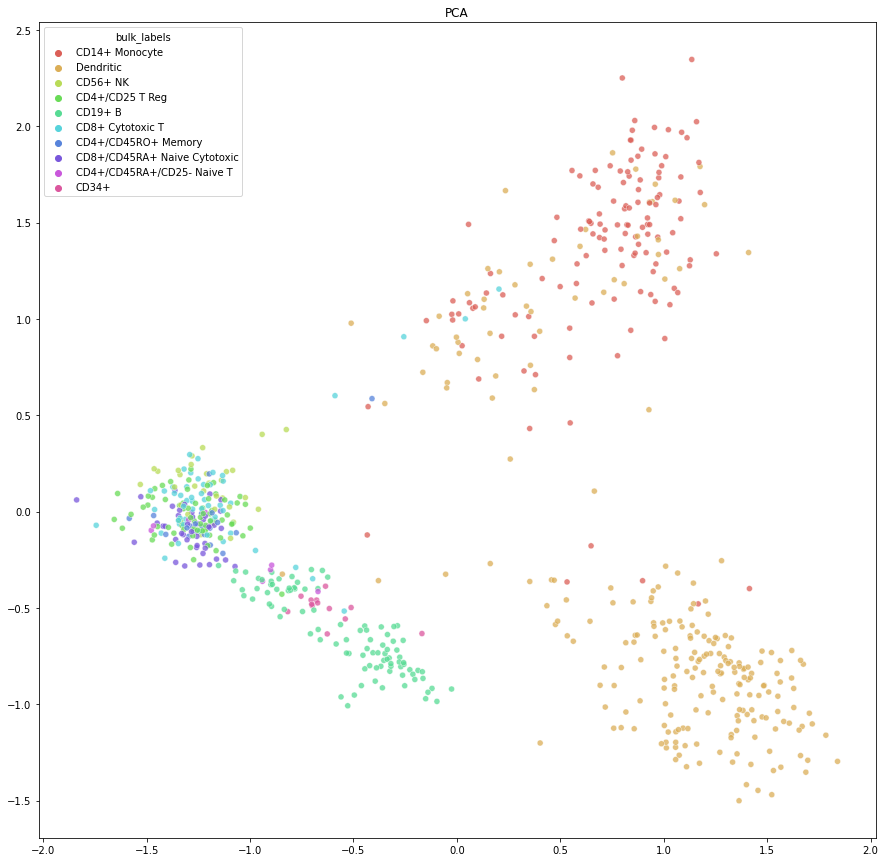

In [36]:
plt.figure(figsize=(15,15))
#plot figure
plt.show()

In [ ]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
X_tsne

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


array([[-8.812177  , -1.2097937 ],
       [-8.906522  , -3.1090703 ],
       [ 4.3944373 , -9.51992   ],
       ...,
       [ 7.7501507 , -8.448863  ],
       [ 6.168869  ,  0.18701407],
       [-6.240799  ,  7.5203333 ]], dtype=float32)

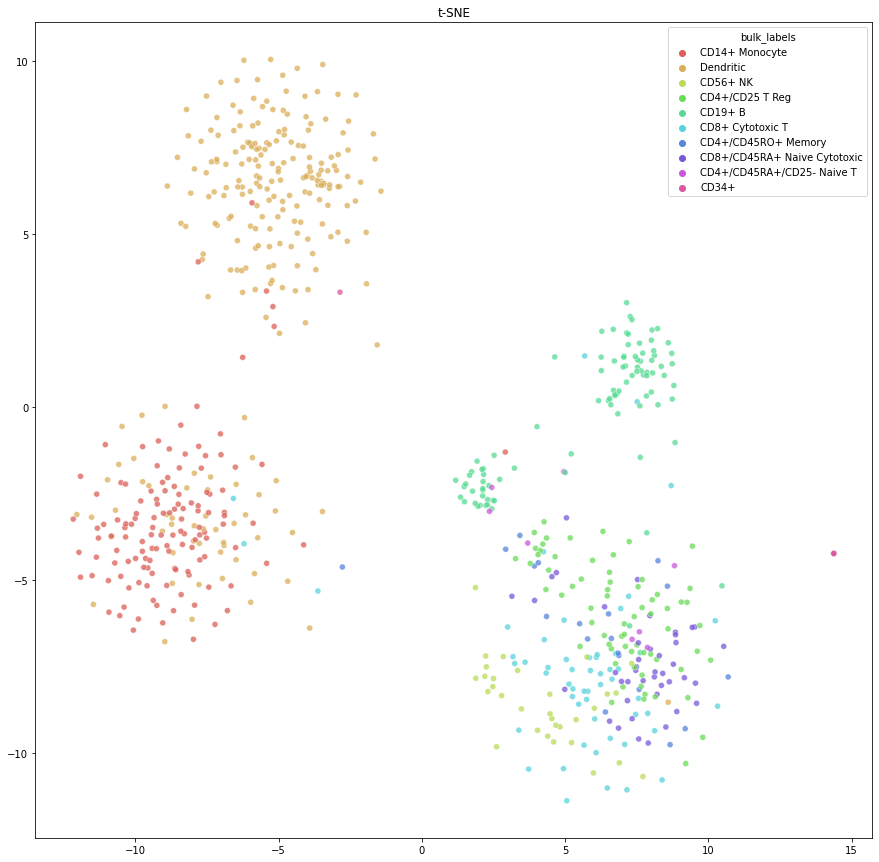

In [ ]:
plt.figure(figsize=(15,15))
#plot figure
plt.show()

Compare the results of PCA, t-SNE, and your autoencoder as ways to visualize the data.

In [ ]:
#model.predict() to retrieve the embedding
# and pca on the embedding 

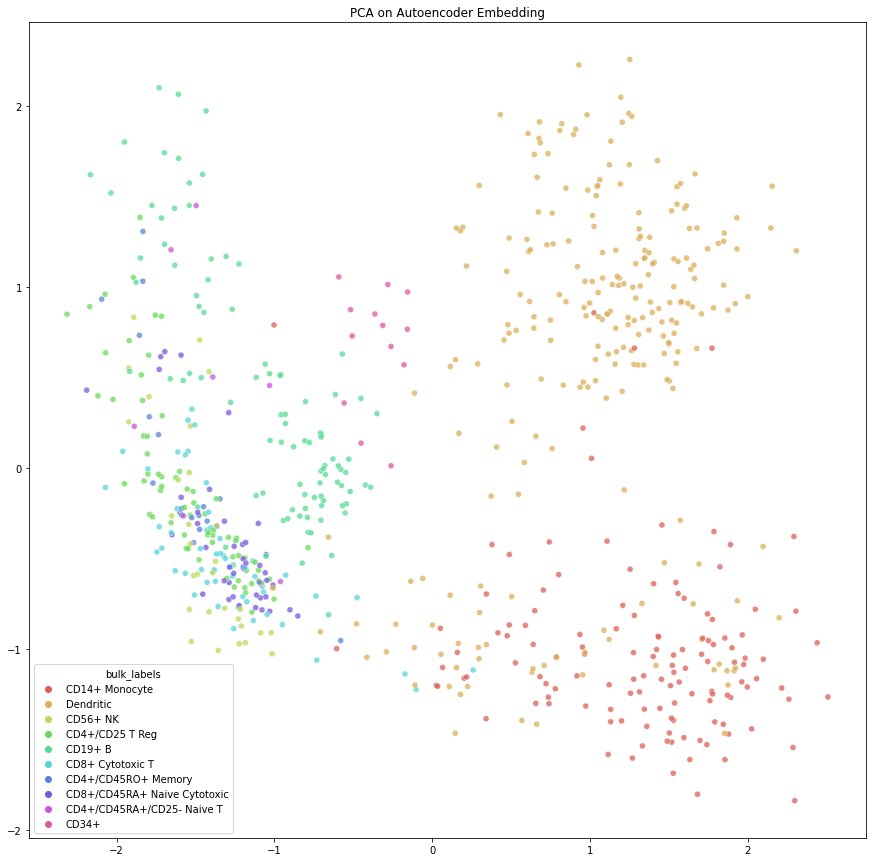

In [35]:
plt.figure(figsize=(15,15))
#plot figure
plt.show()

## **End of part 1**